In [861]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy.stats
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [870]:
plt.rcParams['figure.figsize'] = [10, 5]

In [774]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [775]:
DATA_DIR='GTM-pruebas/'
PRE_DIR='1-PRESIDENTE/'
DNC_DIR='2-DIP-NAC/'
DDT_DIR='3-DIP-DIST/'
MUN_DIR='4-CORPORACIÓN/'
PAR_DIR='5-DIP-PAR/'
pre_files = [f for f in listdir(DATA_DIR+PRE_DIR) if isfile(join(DATA_DIR+PRE_DIR, f))]
dnc_files = [f for f in listdir(DATA_DIR+DNC_DIR) if isfile(join(DATA_DIR+DNC_DIR, f))]
ddt_files = [f for f in listdir(DATA_DIR+DDT_DIR) if isfile(join(DATA_DIR+DDT_DIR, f))]
mun_files = [f for f in listdir(DATA_DIR+MUN_DIR) if isfile(join(DATA_DIR+MUN_DIR, f))]
par_files = [f for f in listdir(DATA_DIR+PAR_DIR) if isfile(join(DATA_DIR+PAR_DIR, f))]


In [776]:
try:
    del df_pre
except:
    pass
try:
    del df_dnc
except:
    pass
try:
    del df_ddt
except:
    pass
try:
    del df_mun
except:
    pass
try:
    del df_par
except:
    pass
df_pre = pd.DataFrame()
df_dnc = pd.DataFrame()
df_ddt = pd.DataFrame()
df_mun = pd.DataFrame()
df_par = pd.DataFrame()

for file in pre_files:
    df_pre=df_pre.append(pd.read_csv(DATA_DIR+PRE_DIR+file,skiprows=5))
for file in dnc_files:
    df_dnc=df_dnc.append(pd.read_csv(DATA_DIR+DNC_DIR+file,skiprows=5))
for file in ddt_files:
    df_ddt=df_ddt.append(pd.read_csv(DATA_DIR+DDT_DIR+file,skiprows=5))
for file in mun_files:
    df_mun=df_mun.append(pd.read_csv(DATA_DIR+MUN_DIR+file,skiprows=5))
for file in par_files:
    df_par=df_par.append(pd.read_csv(DATA_DIR+PAR_DIR+file,skiprows=5))

df_pre = df_pre.fillna(0)
df_dnc = df_dnc.fillna(0)
df_ddt = df_ddt.fillna(0)
df_mun = df_mun.fillna(0)
df_par = df_par.fillna(0)

In [777]:
partidos_pre=list(df_pre.columns[7:29])

In [778]:
for partido in partidos_pre:
    df_pre[partido] = df_pre[partido].replace({'--':0})
    #print(partido)
    df_pre[partido] = df_pre[partido].astype(int)
    
df_pre['NULOS'] = df_pre['NULOS'].replace({'--':0})
df_pre['NULOS'] = df_pre['NULOS'].astype(int)
df_dnc['NULOS'] = df_dnc['NULOS'].replace({'--':0})
df_dnc['NULOS'] = df_dnc['NULOS'].astype(int)
df_ddt['NULOS'] = df_ddt['NULOS'].replace({'--':0})
df_ddt['NULOS'] = df_ddt['NULOS'].astype(int)
df_mun['NULOS'] = df_mun['NULOS'].replace({'--':0})
df_mun['NULOS'] = df_mun['NULOS'].astype(int)
df_par['NULOS'] = df_par['NULOS'].replace({'--':0})
df_par['NULOS'] = df_par['NULOS'].astype(int)

df_pre['VÁLIDOS'] = df_pre['VÁLIDOS'].replace({'--':0})
df_pre['VÁLIDOS'] = df_pre['VÁLIDOS'].astype(int)
df_dnc['VÁLIDOS'] = df_dnc['VÁLIDOS'].replace({'--':0})
df_dnc['VÁLIDOS'] = df_dnc['VÁLIDOS'].astype(int)
df_ddt['VÁLIDOS'] = df_ddt['VÁLIDOS'].replace({'--':0})
df_ddt['VÁLIDOS'] = df_ddt['VÁLIDOS'].astype(int)
df_mun['VÁLIDOS'] = df_mun['VÁLIDOS'].replace({'--':0})
df_mun['VÁLIDOS'] = df_mun['VÁLIDOS'].astype(int)
df_par['VÁLIDOS'] = df_par['VÁLIDOS'].replace({'--':0})
df_par['VÁLIDOS'] = df_par['VÁLIDOS'].astype(int)

df_pre['TOTAL'] = df_pre['TOTAL'].replace({'--':0})
df_pre['TOTAL'] = df_pre['TOTAL'].astype(int)
df_dnc['TOTAL'] = df_dnc['TOTAL'].replace({'--':0})
df_dnc['TOTAL'] = df_dnc['TOTAL'].astype(int)
df_ddt['TOTAL'] = df_ddt['TOTAL'].replace({'--':0})
df_ddt['TOTAL'] = df_ddt['TOTAL'].astype(int)
df_mun['TOTAL'] = df_mun['TOTAL'].replace({'--':0})
df_mun['TOTAL'] = df_mun['TOTAL'].astype(int)
df_par['TOTAL'] = df_par['TOTAL'].replace({'--':0})
df_par['TOTAL'] = df_par['TOTAL'].astype(int)

df_pre['EMITIDOS'] = df_pre['EMITIDOS'].replace({'--':0})
df_pre['EMITIDOS'] = df_pre['EMITIDOS'].astype(int)
df_dnc['EMITIDOS'] = df_dnc['EMITIDOS'].replace({'--':0})
df_dnc['EMITIDOS'] = df_dnc['EMITIDOS'].astype(int)
df_ddt['EMITIDOS'] = df_ddt['EMITIDOS'].replace({'--':0})
df_ddt['EMITIDOS'] = df_ddt['EMITIDOS'].astype(int)
df_mun['EMITIDOS'] = df_mun['EMITIDOS'].replace({'--':0})
df_mun['EMITIDOS'] = df_mun['EMITIDOS'].astype(int)
df_par['EMITIDOS'] = df_par['EMITIDOS'].replace({'--':0})
df_par['EMITIDOS'] = df_par['EMITIDOS'].astype(int)
 
df_pre['PAPELETAS-RECIBIDAS'] = df_pre['PAPELETAS-RECIBIDAS'].replace({'--':0})
df_pre['PAPELETAS-RECIBIDAS'] = df_pre['PAPELETAS-RECIBIDAS'].astype(int)
df_pre['PAPELETAS-NO-USADAS'] = df_pre['PAPELETAS-NO-USADAS'].replace({'--':0})
df_pre['PAPELETAS-NO-USADAS'] = df_pre['PAPELETAS-NO-USADAS'].astype(int)


In [779]:
partidos_mun=list(df_mun.columns[7:22])+list(df_mun.columns[39:])

In [780]:
for partido in partidos_mun:
    df_mun[partido] = df_mun[partido].replace({'--':0})
    #print(partido)
    df_mun[partido] = df_mun[partido].astype(int)

In [781]:
#Nulos
print("Actualización de votos nulos:\n")
print("Presidente: "+"{:.0f}".format(100*df_pre['NULOS'].sum()/df_pre['TOTAL'].sum())+ "% de "+"{:,}".format(int(df_pre['TOTAL'].sum())))
print("Diputados Nacional: "+"{:.0f}".format(100*df_dnc['NULOS'].sum()/df_dnc['TOTAL'].sum())+ "% de "+"{:,}".format(int(df_dnc['TOTAL'].sum())))
print("Diputados Distrital: "+"{:.0f}".format(100*df_ddt['NULOS'].sum()/df_ddt['TOTAL'].sum())+ "% de "+"{:,}".format(int(df_ddt['TOTAL'].sum())))
print("Municipal: "+"{:.0f}".format(100*df_mun['NULOS'].sum()/df_mun['TOTAL'].sum())+ "% de "+"{:,}".format(int(df_mun['TOTAL'].sum())))
print("Parlacen: "+"{:.0f}".format(100*df_par['NULOS'].sum()/df_par['TOTAL'].sum())+ "% de "+"{:,}".format(int(df_par['TOTAL'].sum())))
print("\n{:,}".format(int(df_pre[partidos_pre].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_pre[partidos_pre].astype(bool).sum().max())/len(df_pre)) +"%) de " +"{:,}".format(len(df_pre))+" actas reportadas")
print('#EleccionesGT2023')

Actualización de votos nulos:

Presidente: 18% de 5,443,654
Diputados Nacional: 15% de 5,469,559
Diputados Distrital: 12% de 5,464,735
Municipal: 5% de 5,480,493
Parlacen: 22% de 5,467,535

23,918 (97%) de 24,585 actas reportadas
#EleccionesGT2023


In [782]:
print("Actualización para presidente:\n")
for index, item in df_pre[partidos_pre].sum().divide(df_pre['TOTAL'].sum()/100).sort_values(ascending=False)[:6].items():
    print(index+" {:.1f}".format(item)+"%")
print("\n{:,}".format(int(df_pre[partidos_pre].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_pre[partidos_pre].astype(bool).sum().max())/len(df_pre)) +"%) de " +"{:,}".format(len(df_pre))+" actas reportadas")
print('#EleccionesGT2023')

Actualización para presidente:

UNE 15.9%
SEMILLA 11.9%
VAMOS 7.9%
VIVA 7.4%
CABAL 6.8%
VALOR UNIONISTA 6.6%

23,918 (97%) de 24,585 actas reportadas
#EleccionesGT2023


In [783]:
#municipalidad
alcaldes={}
for index, row in df_mun[partidos_mun].groupby(df_mun['MUNICIPIO']).sum().iterrows():
    if row.max()>0:
        partido_temp=row.idxmax()
        #print(partido_temp,row.name)
        try:
            alcaldes[partido_temp]+=1
        except:
            alcaldes[partido_temp]=1


In [784]:
for partido in alcaldes:
    print(partido +" "+str(alcaldes[partido]))

VAMOS 129
PHG 4
UNE 37
C.C.A. 1
ELEFANTE 2
VALOR 13
FUTURO 1
COCIMI 1
TODOS 15
CCC 2
VICTORIA 5
CABAL 50
CREO 3
AZUL 2
VALOR UNIONISTA 9
VIVA 8
CH ICH 1
PODEMOS 5
LIBRE CIUDAD VIEJA 1
CCDC 1
BIEN 6
U R N G - MAIZ 2
COCIPROG 1
PPN 10
CAMBIO 4
PPG 1
SEMILLA 1
MLP 2
SAMAJEL 1
COCIECH 1
EL TUNO 1
UNIONISTA 2
VOS 1
COCIEES 1
DESANRAY 1
CC SOMOS STA CATARINA BARAHONA 1
CABRA 1
SUD 1
COMITE CIVICO SOMOS SUMPANGO 1
C.C.T. 1
CCER-19PAZ 1
WINAQ 1


In [785]:
print("Estimación actual alcaldes:\n")
for (partido, numeros) in sorted(alcaldes.items(), key=lambda x:x[1], reverse=True):
    print(partido, numeros)
print("\n{:,}".format(int(df_mun[partidos_mun].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_mun[partidos_mun].astype(bool).sum().max())/len(df_mun)) +"%) de " +"{:,}".format(len(df_mun))+" actas reportadas")
print('#EleccionesGT2023')

Estimación actual alcaldes:

VAMOS 129
CABAL 50
UNE 37
TODOS 15
VALOR 13
PPN 10
VALOR UNIONISTA 9
VIVA 8
BIEN 6
VICTORIA 5
PODEMOS 5
PHG 4
CAMBIO 4
CREO 3
ELEFANTE 2
CCC 2
AZUL 2
U R N G - MAIZ 2
MLP 2
UNIONISTA 2
C.C.A. 1
FUTURO 1
COCIMI 1
CH ICH 1
LIBRE CIUDAD VIEJA 1
CCDC 1
COCIPROG 1
PPG 1
SEMILLA 1
SAMAJEL 1
COCIECH 1
EL TUNO 1
VOS 1
COCIEES 1
DESANRAY 1
CC SOMOS STA CATARINA BARAHONA 1
CABRA 1
SUD 1
COMITE CIVICO SOMOS SUMPANGO 1
C.C.T. 1
CCER-19PAZ 1
WINAQ 1

23,019 (94%) de 24,427 actas reportadas
#EleccionesGT2023


In [786]:
absten=[]
for index, row in df_pre.iterrows():
    usadas=int(row['PAPELETAS-RECIBIDAS'])
    no_usadas=int(row['PAPELETAS-NO-USADAS'])
    if (usadas>0 and no_usadas>0):
      absten.append(usadas/(usadas+no_usadas))  

In [787]:
mean_confidence_interval(absten)

(0.7226890012308647, 0.7217380444453876, 0.7236399580163417)

In [822]:
#Diputados Nacional
total_nac=32
partidos_dnc=list(df_dnc.columns[7:33])#+['NULOS']

In [824]:
for partido in partidos_dnc:
    df_dnc[partido] = df_dnc[partido].replace({'--':0})
    #print(partido)
    df_dnc[partido] = df_dnc[partido].astype(int)

In [825]:
dhondt=[]
for index, item in df_dnc[partidos_dnc].sum().items():
    for i in range(total_nac):
        dhondt.append((index,item/(i+1)))

In [826]:
dhondt.sort(key = lambda x: x[1], reverse=True)

In [827]:
dip_dnc={}
top_dnc=dhondt[:total_nac]
for (partido, numeros) in top_dnc:
    try:
        dip_dnc[partido]+=1
    except:
        dip_dnc[partido]=1


In [828]:
print("Estimación actual diputados lista nacional:\n")
for (partido, numeros) in sorted(dip_dnc.items(), key=lambda x:x[1], reverse=True):
    print(partido, numeros)
print("\n{:,}".format(int(df_dnc[partidos_dnc].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_dnc[partidos_dnc].astype(bool).sum().max())/len(df_dnc)) +"%) de " +"{:,}".format(len(df_dnc))+" actas reportadas")
print('#EleccionesGT2023')

Estimación actual diputados lista nacional:

VAMOS 6
UNE 5
SEMILLA 5
CABAL 3
VIVA 3
VALOR UNIONISTA 2
VOS 1
TODOS 1
URNG-MAIZ WINAQ 1
PPN 1
VICTORIA 1
BIEN 1
AZUL 1
ELEFANTE 1

23,736 (97%) de 24,427 actas reportadas
#EleccionesGT2023


In [829]:
#distritales
partidos_ddt=list(df_ddt.columns[7:33])+list(df_ddt.columns[50:])#+['NULOS']
for partido in partidos_ddt:
    df_ddt[partido] = df_ddt[partido].replace({'--':0})
    df_ddt[partido] = df_ddt[partido].astype(int)

In [830]:
total_ddt={
    'Alta Verapaz':9,
    'Baja Verapaz':2,
    'Chimaltenango':5,
    'Distrito Central':11,
    'Chiquimula':3,
    'El Progreso':2,
    'Escuintla':6,
    'Guatemala':19,
    'Huehuetenango':10,
    'Izabal':3,
    'Jalapa':3,
    'Jutiapa':4,
    'Petén':4,
    'Quetzaltenango':7,
    'Quiché':8,
    'Retalhuleu':3,
    'Sacatepéquez':3,
    'San Marcos':9,
    'Santa Rosa':3,
    'Sololá':3,
    'Suchitepéquez':5,
    'Totonicapán':4,
    'Zacapa':2,
    
}

In [831]:
#df_ddt[partidos_ddt].groupby(df_ddt['DEPARTAMENTO']).sum()

In [832]:
dip_ddt={}
for index, row in df_ddt[partidos_ddt].groupby(df_ddt['DEPARTAMENTO']).sum().iterrows():
    dhondt_temp=[]
    for partido in partidos_ddt:
        for i in range(total_ddt[row.name]):
            dhondt_temp.append((partido,row[partido]/(i+1)))
    dhondt_temp.sort(key = lambda x: x[1], reverse=True)
    dip_ddt[row.name]={}
    top_ddt_temp=dhondt_temp[:total_ddt[row.name]]
    for (partido_t, numeros) in top_ddt_temp:
        try:
            dip_ddt[row.name][partido_t]+=1
        except:
            dip_ddt[row.name][partido_t]=1


In [833]:
for departamento in dip_ddt:
    print("\nEstimación actual diputados distritales ("+departamento+"):\n")
    for partido in dip_ddt[departamento]:
        print(partido, dip_ddt[departamento][partido])
    #print("\n{:,}".format(int(df_ddt[partidos_ddt].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_ddt[partidos_ddt].astype(bool).sum().max())/len(df_ddt)) +"%) de " +"{:,}".format(len(df_ddt))+" actas reportadas")
    print("\nReportado"+" {:.0f}".format(100*df_ddt[df_ddt["DEPARTAMENTO"]==departamento][partidos_ddt].astype(bool).sum().max()/len(df_ddt[df_ddt["DEPARTAMENTO"]==departamento]))+"%")
    print('#EleccionesGT2023')




Estimación actual diputados distritales (Alta Verapaz):

UNE 3
VAMOS 2
VICTORIA 2
PPN 1
VIVA 1

Reportado 96%
#EleccionesGT2023

Estimación actual diputados distritales (Baja Verapaz):

UNE 1
CABAL 1

Reportado 100%
#EleccionesGT2023

Estimación actual diputados distritales (Chimaltenango):

VAMOS 1
CABAL 1
UNE 1
SEMILLA 1
VIVA 1

Reportado 94%
#EleccionesGT2023

Estimación actual diputados distritales (Chiquimula):

CAMBIO 1
VAMOS 1
UNE 1

Reportado 99%
#EleccionesGT2023

Estimación actual diputados distritales (Distrito Central):

SEMILLA 7
CREO 2
VOS 1
VALOR UNIONISTA 1

Reportado 99%
#EleccionesGT2023

Estimación actual diputados distritales (El Progreso):

VAMOS 1
VALOR 1

Reportado 100%
#EleccionesGT2023

Estimación actual diputados distritales (Escuintla):

UNE 2
VALOR 1
VAMOS 1
CABAL 1
VIVA 1

Reportado 94%
#EleccionesGT2023

Estimación actual diputados distritales (Guatemala):

SEMILLA 7
UNE 2
VOS 2
VALOR 2
VAMOS 2
VIVA 1
CABAL 1
ELEFANTE 1
BIEN 1

Reportado 97%
#EleccionesGT

In [820]:
dip_tot_ddt={}
for departamento in dip_ddt:
    for partido in dip_ddt[departamento]:
        try:
            dip_tot_ddt[partido]+=dip_ddt[departamento][partido]
        except:
            dip_tot_ddt[partido]=dip_ddt[departamento][partido]

In [821]:
print("Estimado actual total diputados distritales:\n")
for partido in dict(sorted(dip_tot_ddt.items(), key=lambda item: item[1], reverse=True)):
    print(partido,dip_tot_ddt[partido])
print("\n{:,}".format(int(df_ddt[partidos_ddt].astype(bool).sum().max())) +" ("+"{:.0f}".format(100*int(df_ddt[partidos_ddt].astype(bool).sum().max())/len(df_ddt)) +"%) de " +"{:,}".format(len(df_ddt))+" actas reportadas")
print('#EleccionesGT2023')


Estimado actual total diputados distritales:

VAMOS 28
NULOS 26
UNE 18
SEMILLA 15
CABAL 13
VALOR 5
TODOS 5
VIVA 4
VOS 3
VALOR UNIONISTA 3
PPN 2
CREO 2
VICTORIA 1
CAMBIO 1
ELEFANTE 1
BIEN 1

23,932 (98%) de 24,427 actas reportadas
#EleccionesGT2023


In [801]:
#reportado
print("Reporte para presidente hasta el momento:\n")
for departamento in dip_ddt:
    print(departamento+" {:.0f}".format(100*df_pre[df_pre["DEPARTAMENTO"]==departamento][partidos_pre].astype(bool).sum().max()/len(df_pre[df_pre["DEPARTAMENTO"]==departamento]))+"%")
print("\n#EleccionesGT2023")

Reporte para presidente hasta el momento:

Alta Verapaz 95%
Baja Verapaz 100%
Chimaltenango 95%
Chiquimula 100%
Distrito Central 99%
El Progreso 99%
Escuintla 90%
Guatemala 98%
Huehuetenango 99%
Izabal 98%
Jalapa 98%
Jutiapa 99%
Petén 100%
Quetzaltenango 99%
Quiché 99%
Retalhuleu 92%
Sacatepéquez 100%
San Marcos 99%
Santa Rosa 99%
Sololá 99%
Suchitepéquez 95%
Totonicapán 99%
Zacapa 100%

#EleccionesGT2023


In [802]:
print("Reportado para alcaldes hasta el momento:\n")
for departamento in dip_ddt:
    print(departamento+" {:.0f}".format(100*df_mun[df_mun["DEPARTAMENTO"]==departamento][partidos_mun].astype(bool).sum().max()/len(df_mun[df_mun["DEPARTAMENTO"]==departamento]))+"%")
print("\n#EleccionesGT2023")

Reportado para alcaldes hasta el momento:

Alta Verapaz 96%
Baja Verapaz 90%
Chimaltenango 92%
Chiquimula 99%
Distrito Central 99%
El Progreso 100%
Escuintla 95%
Guatemala 97%
Huehuetenango 99%
Izabal 99%
Jalapa 97%
Jutiapa 92%
Petén 100%
Quetzaltenango 99%
Quiché 99%
Retalhuleu 92%
Sacatepéquez 99%
San Marcos 94%
Santa Rosa 100%
Sololá 100%
Suchitepéquez 96%
Totonicapán 99%
Zacapa 99%

#EleccionesGT2023


In [803]:
print("Reportado para diputados lista nacional hasta el momento:\n")
for departamento in dip_ddt:
    print(departamento+" {:.0f}".format(100*df_dnc[df_dnc["DEPARTAMENTO"]==departamento][partidos_dnc].astype(bool).sum().max()/len(df_dnc[df_dnc["DEPARTAMENTO"]==departamento]))+"%")
print("\n#EleccionesGT2023")

Reportado para diputados lista nacional hasta el momento:

Alta Verapaz 96%
Baja Verapaz 99%
Chimaltenango 95%
Chiquimula 100%
Distrito Central 99%
El Progreso 99%
Escuintla 95%
Guatemala 97%
Huehuetenango 99%
Izabal 99%
Jalapa 97%
Jutiapa 99%
Petén 100%
Quetzaltenango 99%
Quiché 99%
Retalhuleu 92%
Sacatepéquez 100%
San Marcos 97%
Santa Rosa 99%
Sololá 99%
Suchitepéquez 95%
Totonicapán 99%
Zacapa 99%

#EleccionesGT2023


In [804]:
print("Reportado para diputados distritales hasta el momento:\n")
for departamento in dip_ddt:
    print(departamento+" {:.0f}".format(100*df_ddt[df_ddt["DEPARTAMENTO"]==departamento][partidos_ddt].astype(bool).sum().max()/len(df_ddt[df_ddt["DEPARTAMENTO"]==departamento]))+"%")
print("\n#EleccionesGT2023")

Reportado para diputados distritales hasta el momento:

Alta Verapaz 96%
Baja Verapaz 100%
Chimaltenango 94%
Chiquimula 99%
Distrito Central 99%
El Progreso 100%
Escuintla 94%
Guatemala 97%
Huehuetenango 99%
Izabal 99%
Jalapa 97%
Jutiapa 99%
Petén 100%
Quetzaltenango 100%
Quiché 99%
Retalhuleu 92%
Sacatepéquez 100%
San Marcos 96%
Santa Rosa 99%
Sololá 100%
Suchitepéquez 95%
Totonicapán 99%
Zacapa 99%

#EleccionesGT2023


In [805]:
#participacion
print("Participación hasta el momento:\n")
for departamento in dip_ddt:
    usadas=int(df_pre[['DEPARTAMENTO','PAPELETAS-RECIBIDAS']][df_pre["DEPARTAMENTO"]==departamento]['PAPELETAS-RECIBIDAS'].sum())
    no_usadas=int(df_pre[['DEPARTAMENTO','PAPELETAS-NO-USADAS']][df_pre["DEPARTAMENTO"]==departamento]['PAPELETAS-NO-USADAS'].sum())
    print(departamento+" {:.0f}".format(100*usadas/(usadas+no_usadas))+"%")
print("\n#EleccionesGT2023")

Participación hasta el momento:

Alta Verapaz 74%
Baja Verapaz 71%
Chimaltenango 74%
Chiquimula 71%
Distrito Central 69%
El Progreso 74%
Escuintla 72%
Guatemala 72%
Huehuetenango 69%
Izabal 70%
Jalapa 70%
Jutiapa 72%
Petén 69%
Quetzaltenango 71%
Quiché 73%
Retalhuleu 72%
Sacatepéquez 76%
San Marcos 69%
Santa Rosa 72%
Sololá 81%
Suchitepéquez 74%
Totonicapán 70%
Zacapa 72%

#EleccionesGT2023


In [806]:
#correlacion
print("Correlación entre presidente y alcalde:\n")
for departamento in dip_ddt:
    x=df_pre[partidos_pre+['DEPARTAMENTO']][df_pre['DEPARTAMENTO']==departamento][partidos_pre].sum()
    y=df_mun[partidos_pre+['DEPARTAMENTO']][df_mun['DEPARTAMENTO']==departamento][partidos_pre].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre presidente y alcalde:

Alta Verapaz 0.765
Baja Verapaz 0.734
Chimaltenango 0.414
Chiquimula 0.765
Distrito Central 0.146
El Progreso 0.689
Escuintla 0.718
Guatemala 0.448
Huehuetenango 0.895
Izabal 0.691
Jalapa 0.682
Jutiapa 0.383
Petén 0.774
Quetzaltenango 0.372
Quiché 0.894
Retalhuleu 0.458
Sacatepéquez 0.324
San Marcos 0.483
Santa Rosa 0.764
Sololá 0.848
Suchitepéquez 0.469
Totonicapán 0.668
Zacapa 0.718


In [807]:
print("Correlación entre presidente y diputados lista nacional:\n")
for departamento in dip_ddt:
    x=df_pre[partidos_pre+['DEPARTAMENTO']][df_pre['DEPARTAMENTO']==departamento][partidos_pre].sum()
    y=df_dnc[partidos_pre+['DEPARTAMENTO']][df_dnc['DEPARTAMENTO']==departamento][partidos_pre].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre presidente y diputados lista nacional:

Alta Verapaz 0.893
Baja Verapaz 0.859
Chimaltenango 0.889
Chiquimula 0.814
Distrito Central 0.941
El Progreso 0.838
Escuintla 0.929
Guatemala 0.953
Huehuetenango 0.957
Izabal 0.864
Jalapa 0.870
Jutiapa 0.606
Petén 0.908
Quetzaltenango 0.847
Quiché 0.944
Retalhuleu 0.830
Sacatepéquez 0.956
San Marcos 0.735
Santa Rosa 0.869
Sololá 0.933
Suchitepéquez 0.779
Totonicapán 0.880
Zacapa 0.821


In [808]:
print("Correlación entre presidente y diputados distrital:\n")
for departamento in dip_ddt:
    x=df_pre[partidos_pre+['DEPARTAMENTO']][df_pre['DEPARTAMENTO']==departamento][partidos_pre].sum()
    y=df_ddt[partidos_pre+['DEPARTAMENTO']][df_ddt['DEPARTAMENTO']==departamento][partidos_pre].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre presidente y diputados distrital:

Alta Verapaz 0.871
Baja Verapaz 0.816
Chimaltenango 0.763
Chiquimula 0.567
Distrito Central 0.935
El Progreso 0.669
Escuintla 0.848
Guatemala 0.886
Huehuetenango 0.941
Izabal 0.787
Jalapa 0.747
Jutiapa 0.394
Petén 0.875
Quetzaltenango 0.759
Quiché 0.936
Retalhuleu 0.532
Sacatepéquez 0.923
San Marcos 0.642
Santa Rosa 0.785
Sololá 0.919
Suchitepéquez 0.680
Totonicapán 0.783
Zacapa 0.700


In [840]:
print("Correlación entre alcaldes y diputados distrital:\n")
interseccion=list(set(partidos_ddt) & set(partidos_mun))
for departamento in dip_ddt:
    x=df_ddt[interseccion+['DEPARTAMENTO']][df_ddt['DEPARTAMENTO']==departamento][interseccion].sum()
    y=df_mun[interseccion+['DEPARTAMENTO']][df_mun['DEPARTAMENTO']==departamento][interseccion].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre alcaldes y diputados distrital:

Alta Verapaz 0.969
Baja Verapaz 0.906
Chimaltenango 0.835
Chiquimula 0.835
Distrito Central 0.205
El Progreso 0.969
Escuintla 0.931
Guatemala 0.488
Huehuetenango 0.983
Izabal 0.978
Jalapa 0.985
Jutiapa 0.903
Petén 0.908
Quetzaltenango 0.857
Quiché 0.991
Retalhuleu 0.912
Sacatepéquez 0.589
San Marcos 0.939
Santa Rosa 0.993
Sololá 0.961
Suchitepéquez 0.924
Totonicapán 0.964
Zacapa 0.970


In [841]:
print("Correlación entre alcaldes y diputados nacional:\n")
interseccion=list(set(partidos_dnc) & set(partidos_mun))
for departamento in dip_ddt:
    x=df_dnc[interseccion+['DEPARTAMENTO']][df_dnc['DEPARTAMENTO']==departamento][interseccion].sum()
    y=df_mun[interseccion+['DEPARTAMENTO']][df_mun['DEPARTAMENTO']==departamento][interseccion].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre alcaldes y diputados nacional:

Alta Verapaz 0.960
Baja Verapaz 0.938
Chimaltenango 0.744
Chiquimula 0.967
Distrito Central 0.134
El Progreso 0.958
Escuintla 0.855
Guatemala 0.435
Huehuetenango 0.977
Izabal 0.954
Jalapa 0.906
Jutiapa 0.922
Petén 0.930
Quetzaltenango 0.733
Quiché 0.984
Retalhuleu 0.779
Sacatepéquez 0.460
San Marcos 0.924
Santa Rosa 0.975
Sololá 0.957
Suchitepéquez 0.886
Totonicapán 0.918
Zacapa 0.949


In [842]:
print("Correlación entre diputados distritales y nacional:\n")
interseccion=list(set(partidos_dnc) & set(partidos_ddt))
for departamento in dip_ddt:
    x=df_dnc[interseccion+['DEPARTAMENTO']][df_dnc['DEPARTAMENTO']==departamento][interseccion].sum()
    y=df_ddt[interseccion+['DEPARTAMENTO']][df_ddt['DEPARTAMENTO']==departamento][interseccion].sum()
    print(departamento+" {:.3f}".format(np.corrcoef(x, y)[0,1]))

Correlación entre diputados distritales y nacional:

Alta Verapaz 0.985
Baja Verapaz 0.957
Chimaltenango 0.939
Chiquimula 0.897
Distrito Central 0.986
El Progreso 0.929
Escuintla 0.930
Guatemala 0.959
Huehuetenango 0.989
Izabal 0.982
Jalapa 0.922
Jutiapa 0.937
Petén 0.985
Quetzaltenango 0.948
Quiché 0.994
Retalhuleu 0.820
Sacatepéquez 0.987
San Marcos 0.980
Santa Rosa 0.977
Sololá 0.973
Suchitepéquez 0.980
Totonicapán 0.945
Zacapa 0.968


In [849]:
#cluster
df_sca=df_pre[partidos_pre+['DEPARTAMENTO']].groupby(df_pre['DEPARTAMENTO']).sum().copy()

In [856]:
df_nor=df_sca.div(df_sca.sum(axis=1), axis=0).copy()

In [873]:
complete_clustering = linkage(df_nor, method="complete", metric="euclidean")
average_clustering = linkage(df_nor, method="average", metric="euclidean")
single_clustering = linkage(df_nor, method="single", metric="euclidean")

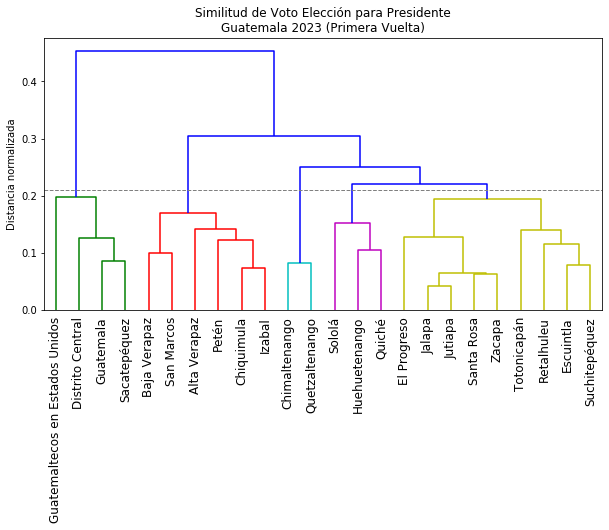

In [887]:
dendrogram(complete_clustering, leaf_rotation=90,leaf_font_size=12, labels=df_nor.index, color_threshold=0.21)
plt.axhline(y=0.21, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud de Voto Elección para Presidente\nGuatemala 2023 (Primera Vuelta)')
plt.ylabel("Distancia normalizada")
plt.show()